In [113]:
# lets look how the gradient decent is use full for finding the minimum value in the error function.
#we will also go throught the math behind the training.

Math behind the Traning.

* LMS (Least Mean Squared) Update rule.

* parameter = parameter - LR * (partial derivate of Loss w.r.t parameter)

* A partial derivate indicates how much total loss increase of decreased if you change theta parameter by a very small amount.

* 

* 

* 

* 

* 

* 

* 

* 

* 

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

In [114]:
#the above formula goes to the each theta parameter.
#but how do we train the model you this method?

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

/var/folders/21/pdrmwf413hsb017fddtwdvkw0000gn/T/ipykernel_3051/2099696251.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [116]:
#lets generate our own dummy data.
def data_generation(size, noise_scale):
    X = np.random.randn(size)  # all this data will be mean==0 and varience = 1
    X = X * 16
    noise = np.random.randn(size) * noise_scale
    Y = 7 * X + 8 + noise
    return X, Y

In [117]:
X,Y = data_generation(10000,36)

In [118]:
print(X[:10], Y[:10])
print(X.shape, Y.shape)

[-39.28236741  10.33405355  21.0730258   -3.00375461 -14.90952833
   1.57328265   5.82795048  30.1543428    6.54957638 -12.62871141] [-287.46857312  155.57095215  103.6921792  -105.40829312  -92.66799549
  130.0918446    20.62745127  154.74563472   90.26978714  -58.31752537]
(10000,) (10000,)


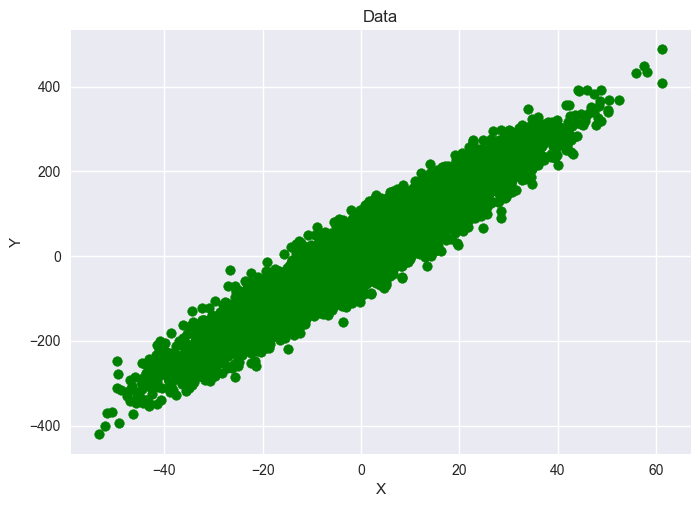

In [119]:
#visualize the data.
def plotData(X,Y, color='green', title = 'Data'):
    plt.scatter(X,Y, color=color)
    plt.title(title)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()
plotData(X,Y)

In [120]:
# this looks a little bit close to the actual real word data.

In [121]:
# before we feed this data to the training algo, we need to normalize this data and split into train and test.
#what is the normalization.

Normalization:-

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

In [122]:
def normalizing(data):
    #standardization.
    #X = (X - X.mean())/(X.std())
    return (data-data.mean())/data.std()

In [123]:
print(X.std())
X = normalizing(X)
print(X.std())

15.991737784325467
1.0


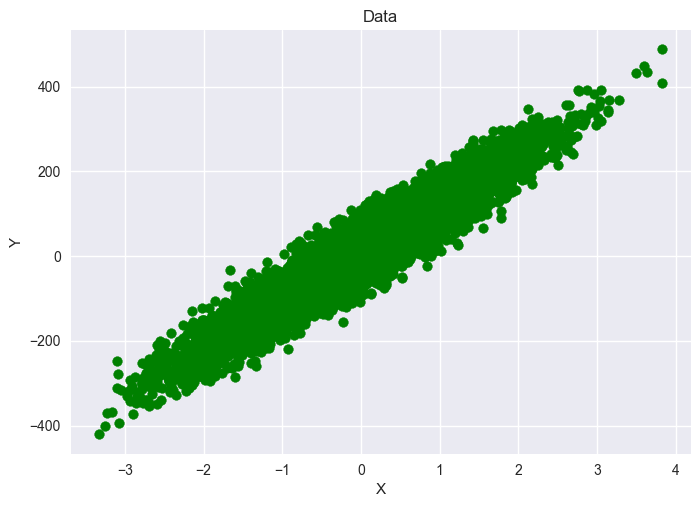

In [124]:
plotData(X,Y)

In [125]:
# see the scales are changed but the relation between the input and output data is not changed.
# there will be a new center that's it.

In [126]:
#lets do the train test and split

def train_test_split(X,Y,ratio=0.75):
    train_len = int(X.shape[0] * ratio)
    #first we need to shuffle.
    data = np.zeros((X.shape[0],2))
    data[:,0] = X
    data[:,1] = Y
    np.random.shuffle(data)
    X = data[:,0]
    Y = data[:,1]
    return X[:train_len], X[train_len:], Y[:train_len], Y[train_len:]

In [127]:
X_train, X_test, Y_train, Y_test  = train_test_split(X,Y)

In [128]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(7500,) (2500,) (7500,) (2500,)


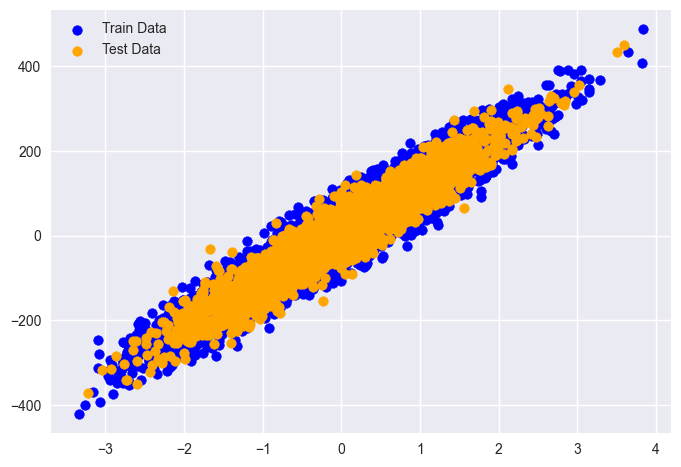

In [130]:
#now we got the training data testing data.
plt.scatter(X_train, Y_train, color='blue', label='Train Data')
plt.scatter(X_test, Y_test, color='orange', label = 'Test Data')
plt.legend()
plt.show()

Modeling:-

* Here we will see how to build the hypothesis and gradient function.

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

*

In [140]:
#Hypothesis.
def hypothesis(X, theta):
    return theta[0] + theta[1]*X

def error(X,Y,theta):
    Y_predict = hypothesis(X,theta)
    square_data = (Y_predict - Y)**2
    sum_data = np.sum(square_data)
    return sum_data/(2*X.shape[0])


def gradient(X,Y, theta):
    grad = np.zeros((2,))
    for i in range(X.shape[0]):
        exp = hypothesis(X[i],theta) - Y[i]
        grad[0] += exp
        grad[1] += (exp)*X[i]
    return grad/X.shape[0]

def train(X,Y):
    theta = [np.random.randint(3), np.random.randint(7)]
    lr = 0.01
    looper  = 1000
    error_list = []
    for i in range(looper):
        grad = gradient(X,Y,theta)
        error_list.append(error(X,Y,theta))
        theta[0] = theta[0] - lr * grad[0]
        theta[1] = theta[1] - lr* grad[1]
    plt.plot(error_list)
    return theta

[7.8738494953593605, 111.86536080878675]

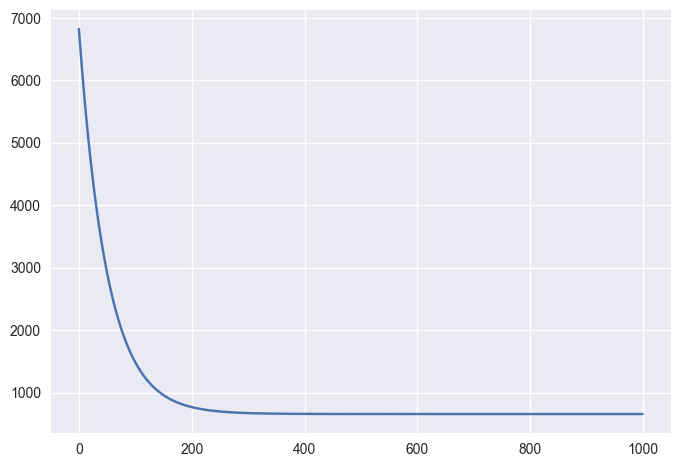

In [141]:
train(X,Y)